In [1]:

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time

%matplotlib inline

# data gathering

In [4]:
# Import Ford GoBike csv file into jupyter notebook
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


# data Assessing 

In [7]:

#getting important details of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [8]:
# take random look
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
361597,1242,2017-09-10 15:36:31.6100,2017-09-10 15:57:14.1640,52,McAllister St at Baker St,37.777416,-122.441838,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,57,Customer,NaN,NaN
255662,772,2017-10-11 03:05:31.1470,2017-10-11 03:18:23.2900,76,McCoppin St at Valencia St,37.771662,-122.422423,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3165,Customer,1986.0,Female
267749,2225,2017-10-07 07:35:53.8900,2017-10-07 08:12:59.4690,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2822,Subscriber,1962.0,Male
338885,824,2017-09-17 13:29:12.5610,2017-09-17 13:42:56.7610,100,Bryant St at 15th St,37.767100,-122.410662,112,Harrison St at 17th St,37.763847,-122.413004,1033,Subscriber,1965.0,Male
329503,392,2017-09-19 23:57:46.0590,2017-09-20 00:04:18.5990,163,Lake Merritt BART Station,37.797320,-122.265320,221,12th St at 6th Ave,37.794353,-122.253875,1263,Subscriber,1984.0,Male
449149,2369,2017-08-10 18:57:04.4870,2017-08-10 19:36:33.9950,177,MacArthur Blvd at Telegraph Ave,37.826286,-122.265100,195,Bay Pl at Vernon St,37.812314,-122.260779,1021,Subscriber,1980.0,Male
222640,852,2017-10-20 15:59:15.4880,2017-10-20 16:13:27.9760,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1400,Subscriber,1989.0,Female
86503,719,2017-12-01 04:41:52.0590,2017-12-01 04:53:51.8600,160,West Oakland BART Station,37.805318,-122.294837,219,Marston Campbell Park,37.809824,-122.280192,1395,Subscriber,1986.0,Male
278824,276,2017-10-04 11:29:36.8240,2017-10-04 11:34:13.7680,50,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,81,Berry St at 4th St,37.775880,-122.393170,2261,Subscriber,1985.0,Female
373710,692,2017-09-06 18:34:53.9880,2017-09-06 18:46:26.8790,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,22,Howard St at Beale St,37.789756,-122.394643,2968,Subscriber,1991.0,Female


In [9]:
# check any duplicated 
df.duplicated().sum()

0

In [10]:
# look as the stats
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


## Quality defects on the data

* change the attributes  bike id, start_station_id, end_station_id to object 
* Start time and end time got object type which needs to be changed to date type
* The time variables can be split  into time of day, day of the week, or month of the year.
* the data provides birth year, which can be used to know the ages of users. 

## cleaning the data 

In [27]:
# define / change data type from object to time type. 

#Coding 
df.bike_id = df_copy.bike_id.astype(str)
df.start_station_id = df_copy.bike_id.astype(str)
df.end_station_id = df_copy.bike_id.astype(str)

In [29]:
# testing 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 22 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null object
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
start_month_num            519700 non-null int64
start_month_char           519700 non-null category
start_hour                

In [14]:
# define / csplit into time of day, day of the week, or month of the year.

# coding 
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_month_num'] = df['start_time'].apply(lambda time: time.month)
df['start_month_char'] = df['start_month_num'].apply(lambda x: calendar.month_abbr[x])

In [30]:
# coding 

df.start_time = pd.to_datetime(df_copy.start_time)
df.end_time = pd.to_datetime(df_copy.end_time)

In [31]:
# testing

print(df['start_month_num'].value_counts())
print(df['start_month_char'].value_counts())

10    108937
9      98558
11     95612
12     86539
8      83292
7      44073
6       2689
Name: start_month_num, dtype: int64
Oct    108937
Sep     98558
Nov     95612
Dec     86539
Aug     83292
Jul     44073
Jun      2689
Name: start_month_char, dtype: int64


In [32]:
# to specify the time 

df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['period_day'] = 'morning'
df['period_day'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'afternoon'
df['period_day'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'night'

C:\Users\alref\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\alref\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
# testing 

# Test: start hour and time of day
print(df['start_hour'].value_counts())
print(df['period_day'].value_counts())

17    60111
8     57227
18    46088
9     45457
16    41339
15    28448
12    27448
13    27374
7     26800
19    26598
10    25217
14    24900
11    24303
20    16642
21    11993
6      8895
22     7967
23     4867
0      2606
5      2145
1      1377
2       860
4       640
3       398
Name: start_hour, dtype: int64
afternoon    209620
morning      195925
night        114155
Name: period_day, dtype: int64


In [34]:
# to specify the day of the week 
df['start_weekday_num'] = df['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['start_weekday_char'] = df['start_weekday_num'].map(dmap)

In [35]:
# convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'start_month_char': ['Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                    'period_day': ['morning', 'afternoon', 'night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [36]:
# code tyhe new featues (ages) 
df['age'] = df['member_birth_year'].apply(lambda x: 2017 - x)

In [39]:
#Testing 
df['age'].describe()

count    453159.000000
mean         36.595213
std          10.513488
min          18.000000
25%          29.000000
50%          34.000000
75%          43.000000
max         131.000000
Name: age, dtype: float64

## II. Univariate Exploration

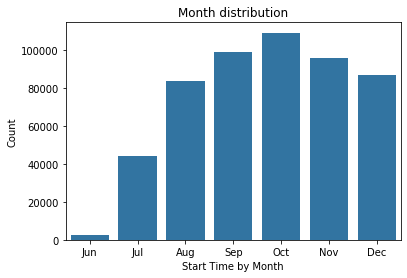

In [40]:
# lets check the start date and location 
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_month_char', color=base_color)
plt.xlabel('Start Time by Month')
plt.ylabel('Count')
plt.title('Month distribution');

looking into above chart its seems June very low due to start of the record of data. So , lets remove it  


In [45]:
# remove June from our data 
new_df = df.query('start_month_num != 6')

In [46]:
# test the data 
len(new_df.query('start_month_num == 6'))

0

In [47]:
#  Location:272 start stations. 
print(len(new_df['start_station_name'].value_counts()))
new_df['start_station_name'].value_counts()

272


San Francisco Ferry Building (Harry Bridges Plaza)                 14978
The Embarcadero at Sansome St                                      13517
San Francisco Caltrain (Townsend St at 4th St)                     12366
San Francisco Caltrain Station 2  (Townsend St at 4th St)          12003
Market St at 10th St                                               11852
Montgomery St BART Station (Market St at 2nd St)                   11207
Berry St at 4th St                                                 10856
Powell St BART Station (Market St at 4th St)                       10097
Howard St at Beale St                                               9809
Steuart St at Market St                                             9347
Powell St BART Station (Market St at 5th St)                        7910
Embarcadero BART Station (Beale St at Market St)                    7549
2nd St at Townsend St - Coming Soon                                 6487
3rd St at Townsend St                              

In [48]:
# Do they have high traffics as end stations? 
print(len(df2['end_station_name'].value_counts()))
df2['end_station_name'].value_counts()

272


San Francisco Caltrain (Townsend St at 4th St)                     17154
San Francisco Ferry Building (Harry Bridges Plaza)                 16856
The Embarcadero at Sansome St                                      16383
San Francisco Caltrain Station 2  (Townsend St at 4th St)          13563
Montgomery St BART Station (Market St at 2nd St)                   13300
Market St at 10th St                                               11223
Powell St BART Station (Market St at 4th St)                       11026
Berry St at 4th St                                                 10512
Steuart St at Market St                                             9321
Powell St BART Station (Market St at 5th St)                        8477
Howard St at Beale St                                               7687
2nd St at Townsend St - Coming Soon                                 7173
Townsend St at 7th St                                               6591
Embarcadero BART Station (Beale St at Market St)   

In [50]:
# summrize the huge data into top 8 locations. 
locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
df_top8 = new_df.loc[new_df['start_station_name'].isin(locs)]

In [51]:
# Test 
df_top8['start_station_name'].value_counts()


San Francisco Ferry Building (Harry Bridges Plaza)           14978
The Embarcadero at Sansome St                                13517
San Francisco Caltrain (Townsend St at 4th St)               12366
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12003
Market St at 10th St                                         11852
Montgomery St BART Station (Market St at 2nd St)             11207
Berry St at 4th St                                           10856
Powell St BART Station (Market St at 4th St)                 10097
Name: start_station_name, dtype: int64

In [54]:
# lest plot the top 8 locations with traffic. 
st_stat_counts = df_top8['start_station_name'].value_counts()
st_stat_order = st_stat_counts.index

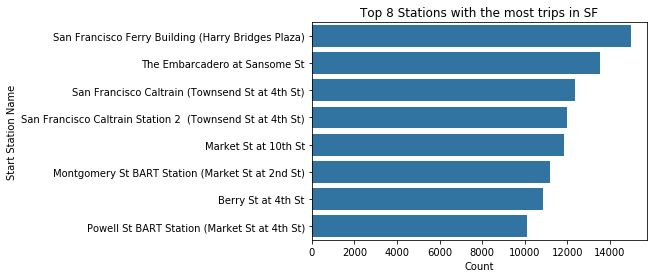

In [55]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_top8, y='start_station_name', color=base_color, order=st_stat_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 8 Stations with the most trips in SF');

all this stations connected to transporartion and buisness area, but lets explore more by timing. 

In [56]:
# Time
mon_cl = ['Jul','Aug','Sep','Oct','Nov','Dec']
mon_cl2 = pd.api.types.CategoricalDtype(ordered=True, categories=mon_cl)
df_top8['start_month_char'] = df_top8['start_month_char'].astype(mon_cl2)

C:\Users\alref\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [94]:
df_top8.to_csv("2017-fordgobike-tripdata-clean.csv", index=False)

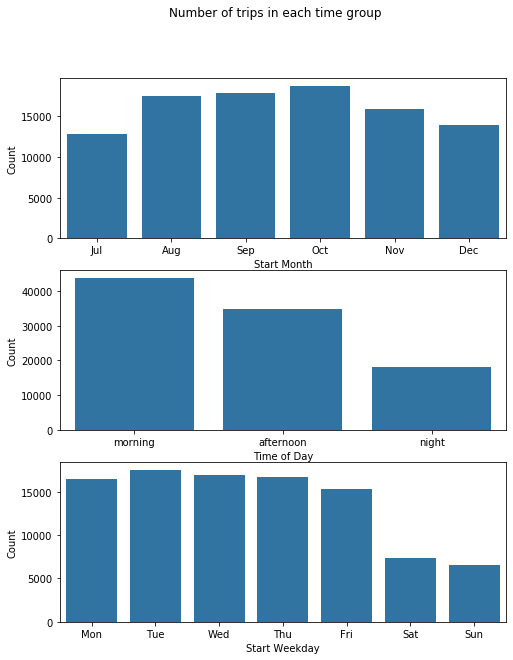

In [95]:
fig, ax = plt.subplots(nrows=3, figsize = [8,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_top8, x = 'start_month_char', color = default_color, ax = ax[0])
sb.countplot(data = df_top8, x = 'period_day', color = default_color, ax = ax[1])
sb.countplot(data = df_top8, x = 'start_weekday_char', color = default_color, ax = ax[2])
ax[0].set_xlabel('Start Month')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Time of Day')
ax[1].set_ylabel('Count')
ax[2].set_xlabel('Start Weekday')
ax[2].set_ylabel('Count')
fig.suptitle('Number of trips in each time group');

excatly as i guessed , its more during weekdays and working hours than night. Putting in considerations the season cold wheather will decrease the number of trips. 

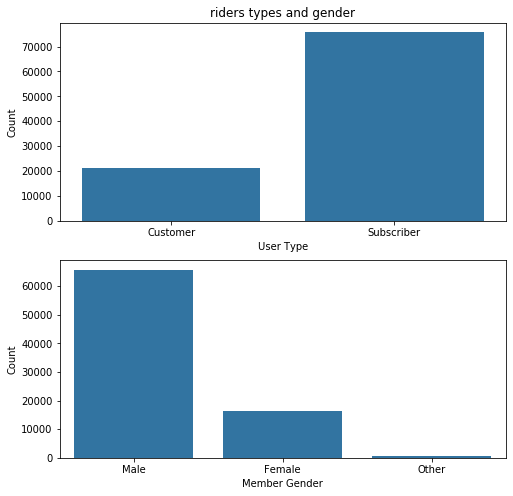

In [68]:
# lets see the gender of users and types. 

fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = df_top8, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = df_top8, x = 'member_gender', color = default_color, ax = ax[1])
ax[0].set_xlabel('User Type')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Member Gender')
ax[1].set_ylabel('Count')
ax[0].set_title('riders types and gender');


In [59]:
# lets explore the others
df_top8.query('member_gender == "Other"')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char,age
401,1682,2017-12-31 16:42:05.414,2017-12-31 17:10:07.979,2605,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2605,Central Ave at Fell St,37.773311,...,Subscriber,1968.0,Other,12,Dec,16,afternoon,6,Sun,49.0
683,619,2017-12-31 14:48:05.864,2017-12-31 14:58:25.250,2642,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2642,Beale St at Harrison St,37.788059,...,Subscriber,1974.0,Other,12,Dec,14,afternoon,6,Sun,43.0
1046,2556,2017-12-31 11:45:27.183,2017-12-31 12:28:03.595,1921,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1921,Washington St at Kearny St,37.795393,...,Customer,1992.0,Other,12,Dec,11,morning,6,Sun,25.0
1514,1682,2017-12-30 20:33:57.744,2017-12-30 21:02:00.296,1926,The Embarcadero at Sansome St,37.804770,-122.403234,1926,S Van Ness Ave at Market St,37.774814,...,Customer,1993.0,Other,12,Dec,20,night,5,Sat,24.0
1599,1375,2017-12-30 18:43:44.406,2017-12-30 19:06:40.177,1926,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,1926,The Embarcadero at Sansome St,37.804770,...,Customer,1993.0,Other,12,Dec,18,night,5,Sat,24.0
1912,2028,2017-12-30 15:22:18.933,2017-12-30 15:56:07.810,2203,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2203,Central Ave at Fell St,37.773311,...,Subscriber,1968.0,Other,12,Dec,15,afternoon,5,Sat,49.0
2346,509,2017-12-30 13:10:21.960,2017-12-30 13:18:51.412,2203,The Embarcadero at Sansome St,37.804770,-122.403234,2203,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Subscriber,1968.0,Other,12,Dec,13,afternoon,5,Sat,49.0
4336,223,2017-12-29 09:43:37.011,2017-12-29 09:47:20.233,1253,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,1253,2nd St at Folsom St,37.785000,...,Subscriber,1987.0,Other,12,Dec,9,morning,4,Fri,30.0
6229,78,2017-12-28 09:52:08.314,2017-12-28 09:53:26.798,72,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,72,Montgomery St BART Station (Market St at 2nd St),37.789625,...,Subscriber,1987.0,Other,12,Dec,9,morning,3,Thu,30.0
6645,956,2017-12-27 21:44:42.113,2017-12-27 22:00:38.125,2580,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2580,Webster St at O'Farrell St,37.783521,...,Subscriber,1957.0,Other,12,Dec,21,night,2,Wed,60.0


from the above we can see Male is more than female and my next investigation will propably tell us why!

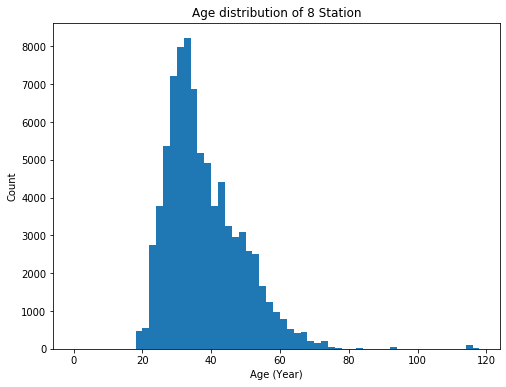

In [67]:
plt.figure(figsize=(8,6))
bins = np.arange(0, df_top8['age'].max()+2, 2)
plt.hist(data=df_top8, x='age', bins=bins)
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('Age distribution of 8 Station');

obvious outliers in the above plot, lets large the scale to have better vision. 


In [61]:
df_top8['age'].describe()

count    82704.000000
mean        37.463206
std         10.857384
min         18.000000
25%         30.000000
50%         35.000000
75%         44.000000
max        117.000000
Name: age, dtype: float64

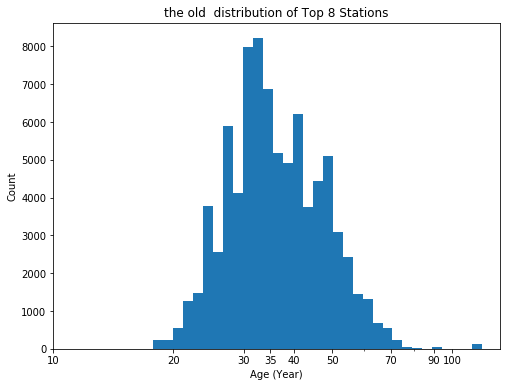

In [66]:
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_top8['age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df_top8, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('the old  distribution of Top 8 Stations');

seems mot riders in ages of 30 and 35, however, there is more than 100 years old. lets check them 



In [63]:
df_top8.query('age > 100')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char,age
8077,501,2017-12-27 09:10:01.210,2017-12-27 09:18:22.353,3672,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3672,Montgomery St BART Station (Market St at 2nd St),37.789625,...,Subscriber,1902.0,Male,12,Dec,9,morning,2,Wed,115.0
16466,559,2017-12-21 09:30:25.835,2017-12-21 09:39:45.530,434,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,434,5th St at Howard St,37.781752,...,Subscriber,1902.0,Female,12,Dec,9,morning,3,Thu,115.0
16977,498,2017-12-21 08:12:08.083,2017-12-21 08:20:26.200,3392,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3392,Montgomery St BART Station (Market St at 2nd St),37.789625,...,Subscriber,1902.0,Male,12,Dec,8,morning,3,Thu,115.0
19981,475,2017-12-20 09:09:33.995,2017-12-20 09:17:29.745,2140,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2140,Montgomery St BART Station (Market St at 2nd St),37.789625,...,Subscriber,1902.0,Male,12,Dec,9,morning,2,Wed,115.0
20347,535,2017-12-20 08:24:50.744,2017-12-20 08:33:46.228,3191,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,3191,5th St at Howard St,37.781752,...,Subscriber,1902.0,Female,12,Dec,8,morning,2,Wed,115.0
27566,504,2017-12-18 09:13:02.240,2017-12-18 09:21:27.046,397,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,397,Montgomery St BART Station (Market St at 2nd St),37.789625,...,Subscriber,1902.0,Male,12,Dec,9,morning,0,Mon,115.0
35111,471,2017-12-15 09:34:52.612,2017-12-15 09:42:44.154,3151,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,3151,5th St at Howard St,37.781752,...,Subscriber,1902.0,Female,12,Dec,9,morning,4,Fri,115.0
35723,512,2017-12-15 08:24:09.992,2017-12-15 08:32:42.557,2189,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2189,Montgomery St BART Station (Market St at 2nd St),37.789625,...,Subscriber,1902.0,Male,12,Dec,8,morning,4,Fri,115.0
39292,928,2017-12-14 09:13:35.492,2017-12-14 09:29:03.631,3345,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,3345,Powell St BART Station (Market St at 4th St),37.786375,...,Subscriber,1902.0,Female,12,Dec,9,morning,3,Thu,115.0
39757,356,2017-12-14 08:40:51.218,2017-12-14 08:46:48.028,320,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,320,2nd St at S Park St,37.782411,...,Subscriber,1911.0,Other,12,Dec,8,morning,3,Thu,106.0


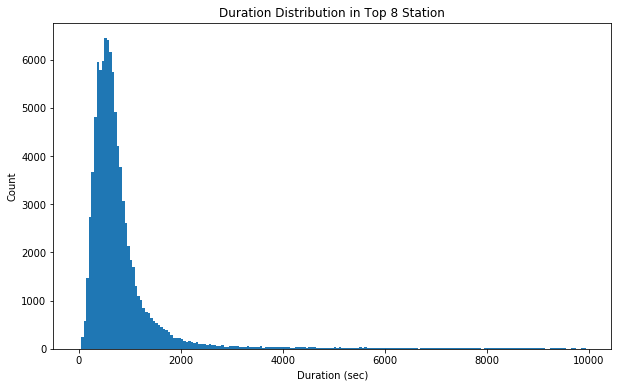

In [64]:
#The distribution of duration of trips
plt.figure(figsize=(10,6))
#bins = np.arange(0, df_top8_le100['duration_sec'].max()+50, 100)
bins = np.arange(0, 10000, 50)
plt.hist(data=df_top8, x='duration_sec', bins=bins)
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Duration of top  8 Station');

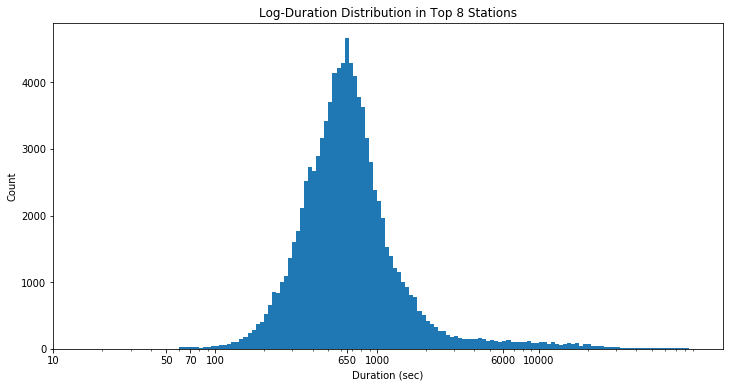

In [65]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_top8['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 6])
plt.hist(data = df_top8, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10,50,70,100,650,1000,6000,10000], [10,50,70,100,650,1000,6000,10000])
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title(' Distribution of Top 8 Stations');

well, seems its about 10 min rides. 

In [70]:
# saving the data in seperate file for future use of the anlysis
df_top8.to_csv("2017-fordgobike-tripdata-clean.csv", index=False)

## III. Bivariate Exploration¶


In [72]:
# listing numeric and catogrial variables. 

numeric_vars = ['age','duration_sec']
times_chr = ['period_day','start_weekday_char','start_month_char']
users_chr = ['user_type','member_gender']

In [73]:
# lets look to the highest station to the least one
loc_cl = locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
loc_cl2 = pd.api.types.CategoricalDtype(ordered=True, categories=loc_cl)
df_top8['start_station_name'] = df_top8['start_station_name'].astype(loc_cl2)

C:\Users\alref\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


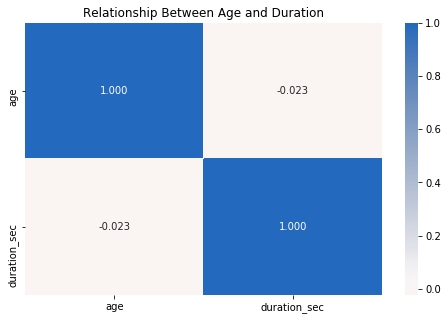

In [74]:
# correlation between age and duration second
plt.figure(figsize = [8, 5])
sb.heatmap(df_top8[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration');

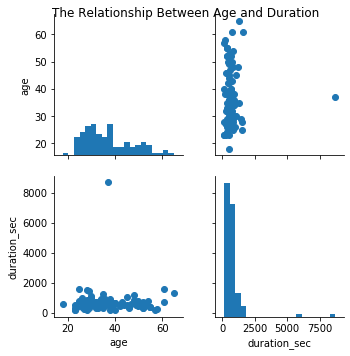

In [77]:
# plot matrix for age and duration: sample 800 so that plots are clearer. 
samples = np.random.choice(df_top8.shape[0], 800, replace = False)
df_top8_samp = df_top8.loc[samples,:]

g = sb.PairGrid(data = df_top8_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)
g.fig.suptitle('The Relationship Between Age and Duration');

well, seems its negative correlation, frankly not expected. 

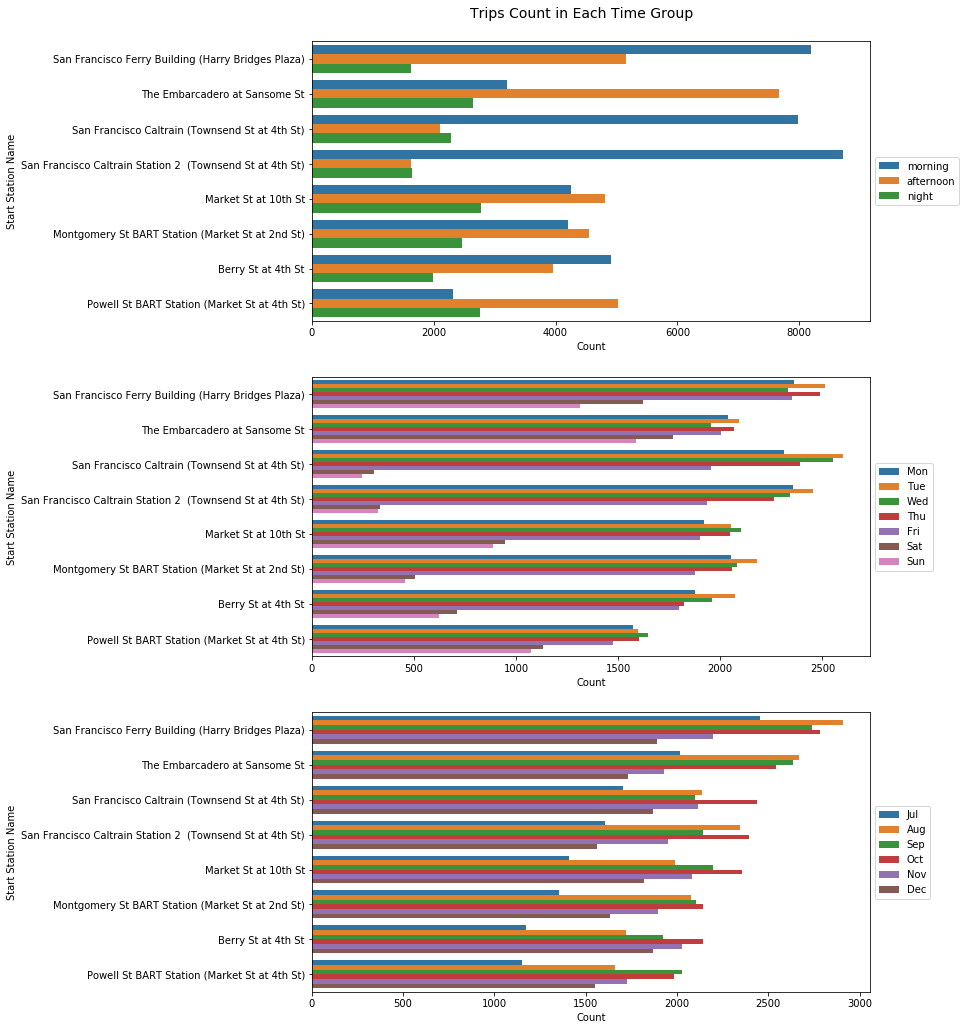

In [78]:
# top 8 stations by times (time of day, weekdays, months)
fig = plt.figure(figsize=(10,16))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Time Group', fontsize=14)
for i in range(1, 4):
    ax = fig.add_subplot(3, 1, i)
    sb.countplot(data=df_top8, y='start_station_name', hue=times_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');

this is very excellent of analysis example when you dig deep, from the above Moring is not always the case to ride, some top stations have afternoon trip.In additio, , its very clear week days correlated with buisness days, weekend have less rides, plus, wheather its impacting the rides in very obvious ways. 

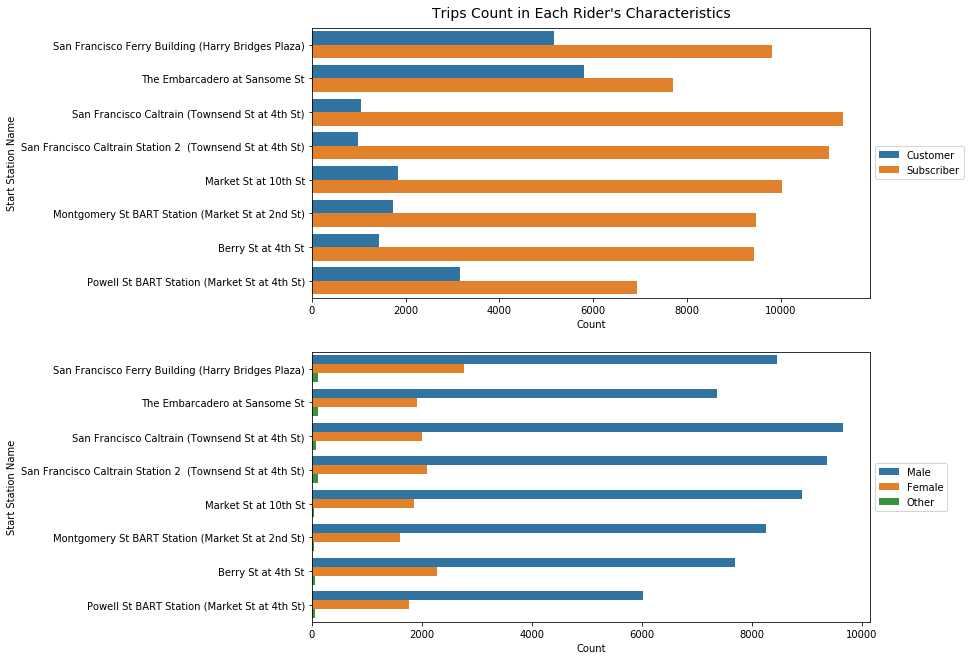

In [79]:
# lets explore users genders and types. 
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Rider\'s Characteristics' , fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=df_top8, y='start_station_name', hue=users_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');

Agan, this is very common sense, sunscribers would ride more than costumer since its better and cheaper, specially if i have same way odf working. Due to genders usually never care about their apperance , would guess females would not use rides to go for work. 




## list the observation during the analysis.

In the top 8 stations, look into the attributes' times and users:

Time:
Well, as we discussed earlier Moring not always the case to rides however, yes its splitt with afternoon.
Week days is alaways correlated with riders, they would use it to go for work
User:
as we have seen , ages between 30 and 35 is highest since is the most productive years for workers ans specially males since we done care how we arrive at work or how we look. 

## IV. Multivariate Exploration

In [89]:
# lets explore more variable to find better result for location and times.But lets see indivisually for riders and their types. 
df_costumers = df_top8.query('user_type == "Customer"')

In [90]:
df_subscribers = df_top8.query('user_type == "Subscriber"')

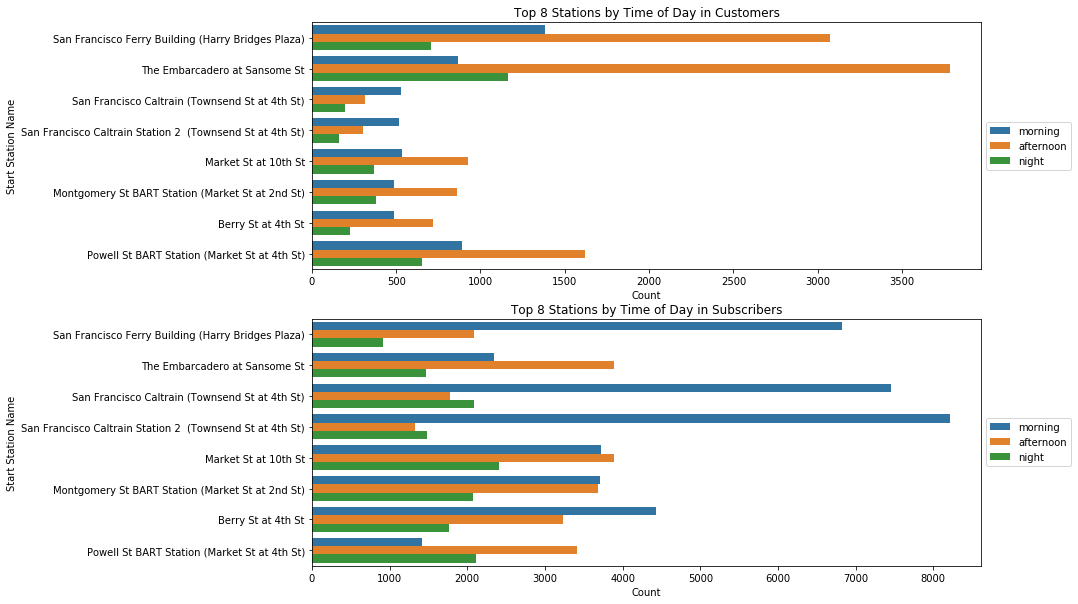

In [91]:
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sb.countplot(data=df_costumers, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Stations by Time of Day in Customers')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=df_subscribers, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Stations by Time of Day in Subscribers')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

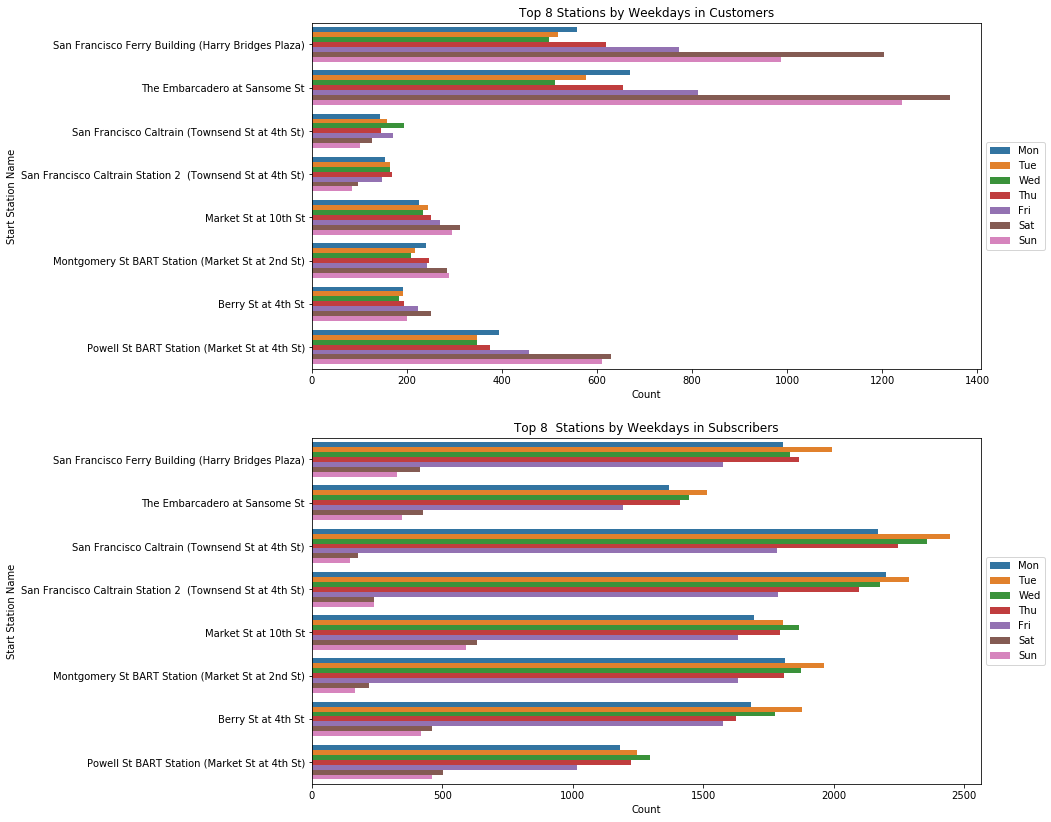

In [92]:
#  Weekday between customers and subscribers 
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_costumers, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Stations by Weekdays in Customers')
plt.ylabel('Start Station Name')
plt.xlabel('Count')

ax = plt.subplot(212)
sb.countplot(data=df_subscribers, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8  Stations by Weekdays in Subscribers')
plt.ylabel('Start Station Name')
plt.xlabel('Count');

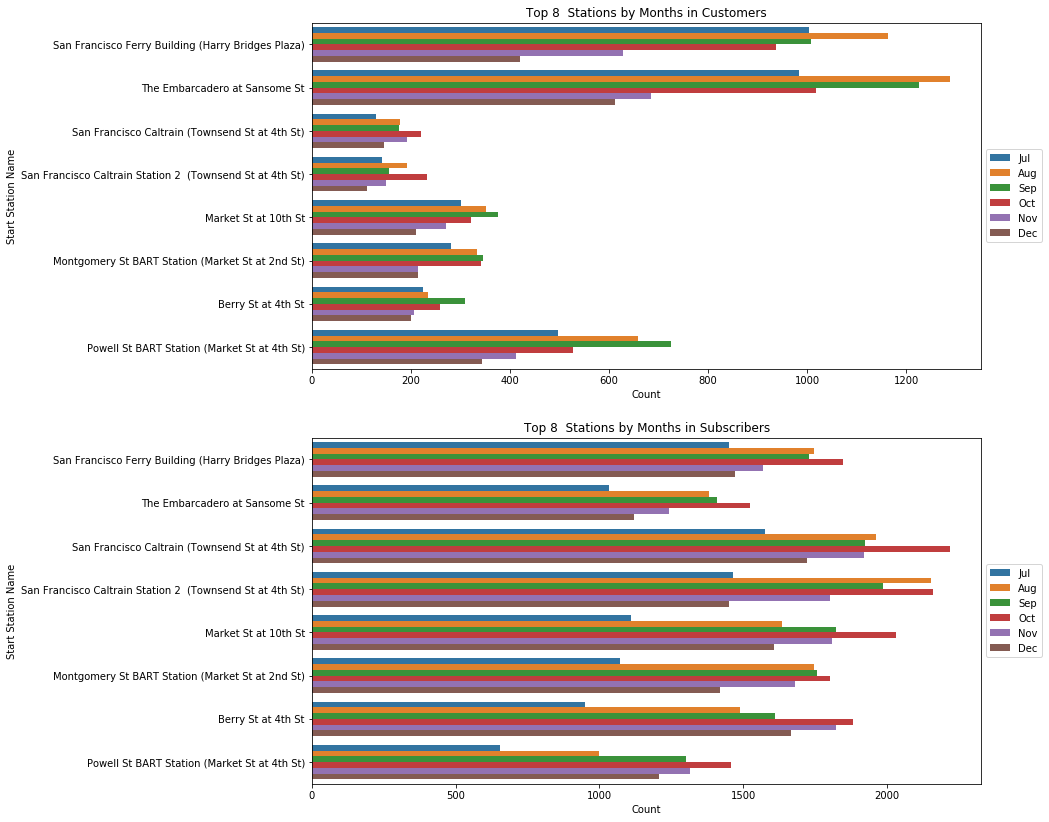

In [93]:
# Month between customers and subscribers
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_costumers, y='start_station_name', hue='start_month_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8  Stations by Months in Customers')
plt.ylabel('Start Station Name')
plt.xlabel('Count')

ax = plt.subplot(212)
sb.countplot(data=df_subscribers, y='start_station_name', hue='start_month_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8  Stations by Months in Subscribers')
plt.ylabel('Start Station Name')
plt.xlabel('Count');

### ovservations from above plots 
 as expected costumers not involved too much in trips over all, however, in August tourism increases which would give more costumers than other months. 